In [ ]:
from bankingSystemLearning import * 
from helperFunctions import *
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import warnings 
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2
%pylab inline 
pylab.rcParams['figure.figsize'] = (20, 20)

: 

In [10]:
theta = np.array([[-0.00082348],
 [-0.00650866]])
# simulation and data collection
simulationSteps = 500
model = bankingSystem(banksFile="balanceSheetAnalysis/banksData_2022.csv", # csv file used to initialize the bank agents
                leverageRatio = 10.0,                                     # leverage ratio upper bound for all banks
                depositReserve = 0.20,                                     # capital reserve as a ratio of portfolio value
                num_borrowing= 20,                                        # number of borrowing request per bank per step
                sizeOfBorrowing = 1.0/3,                                      # size of borrowing as a ratio of equity capital
                num_banks=100,                                            # number of banks in the system 
                alpha = 0.5,                                              # portfolio recovery rate                           
                beta = 0.9,                                               # interbank loan recovery rate
                fedRate = 0.04,                                            # interest rate on borrowing   
                portfolioReturnRate = 0.10,                                # return rate on portfolio
                returnVolatiliy = 0.18,
                gammas = np.linspace(4.0,0.5,100).reshape(-1,1),
                returnCorrelation = np.diag(np.ones(100)),
                liquidityShockNum = 1,                                    # number of liquidity shocks per step      
                shockSize = 0.,                                          # size of the shock
                shockDuration =  [300, 305],
                theta = theta) # duration of the shock
                
model.datacollector.collect(model)
for i in tqdm(range(simulationSteps)):
    model.simulate()
    
agent_data = model.datacollector.get_agent_vars_dataframe()
model_data = model.datacollector.get_model_vars_dataframe()

100%|██████████| 500/500 [00:00<00:00, 516.23it/s]


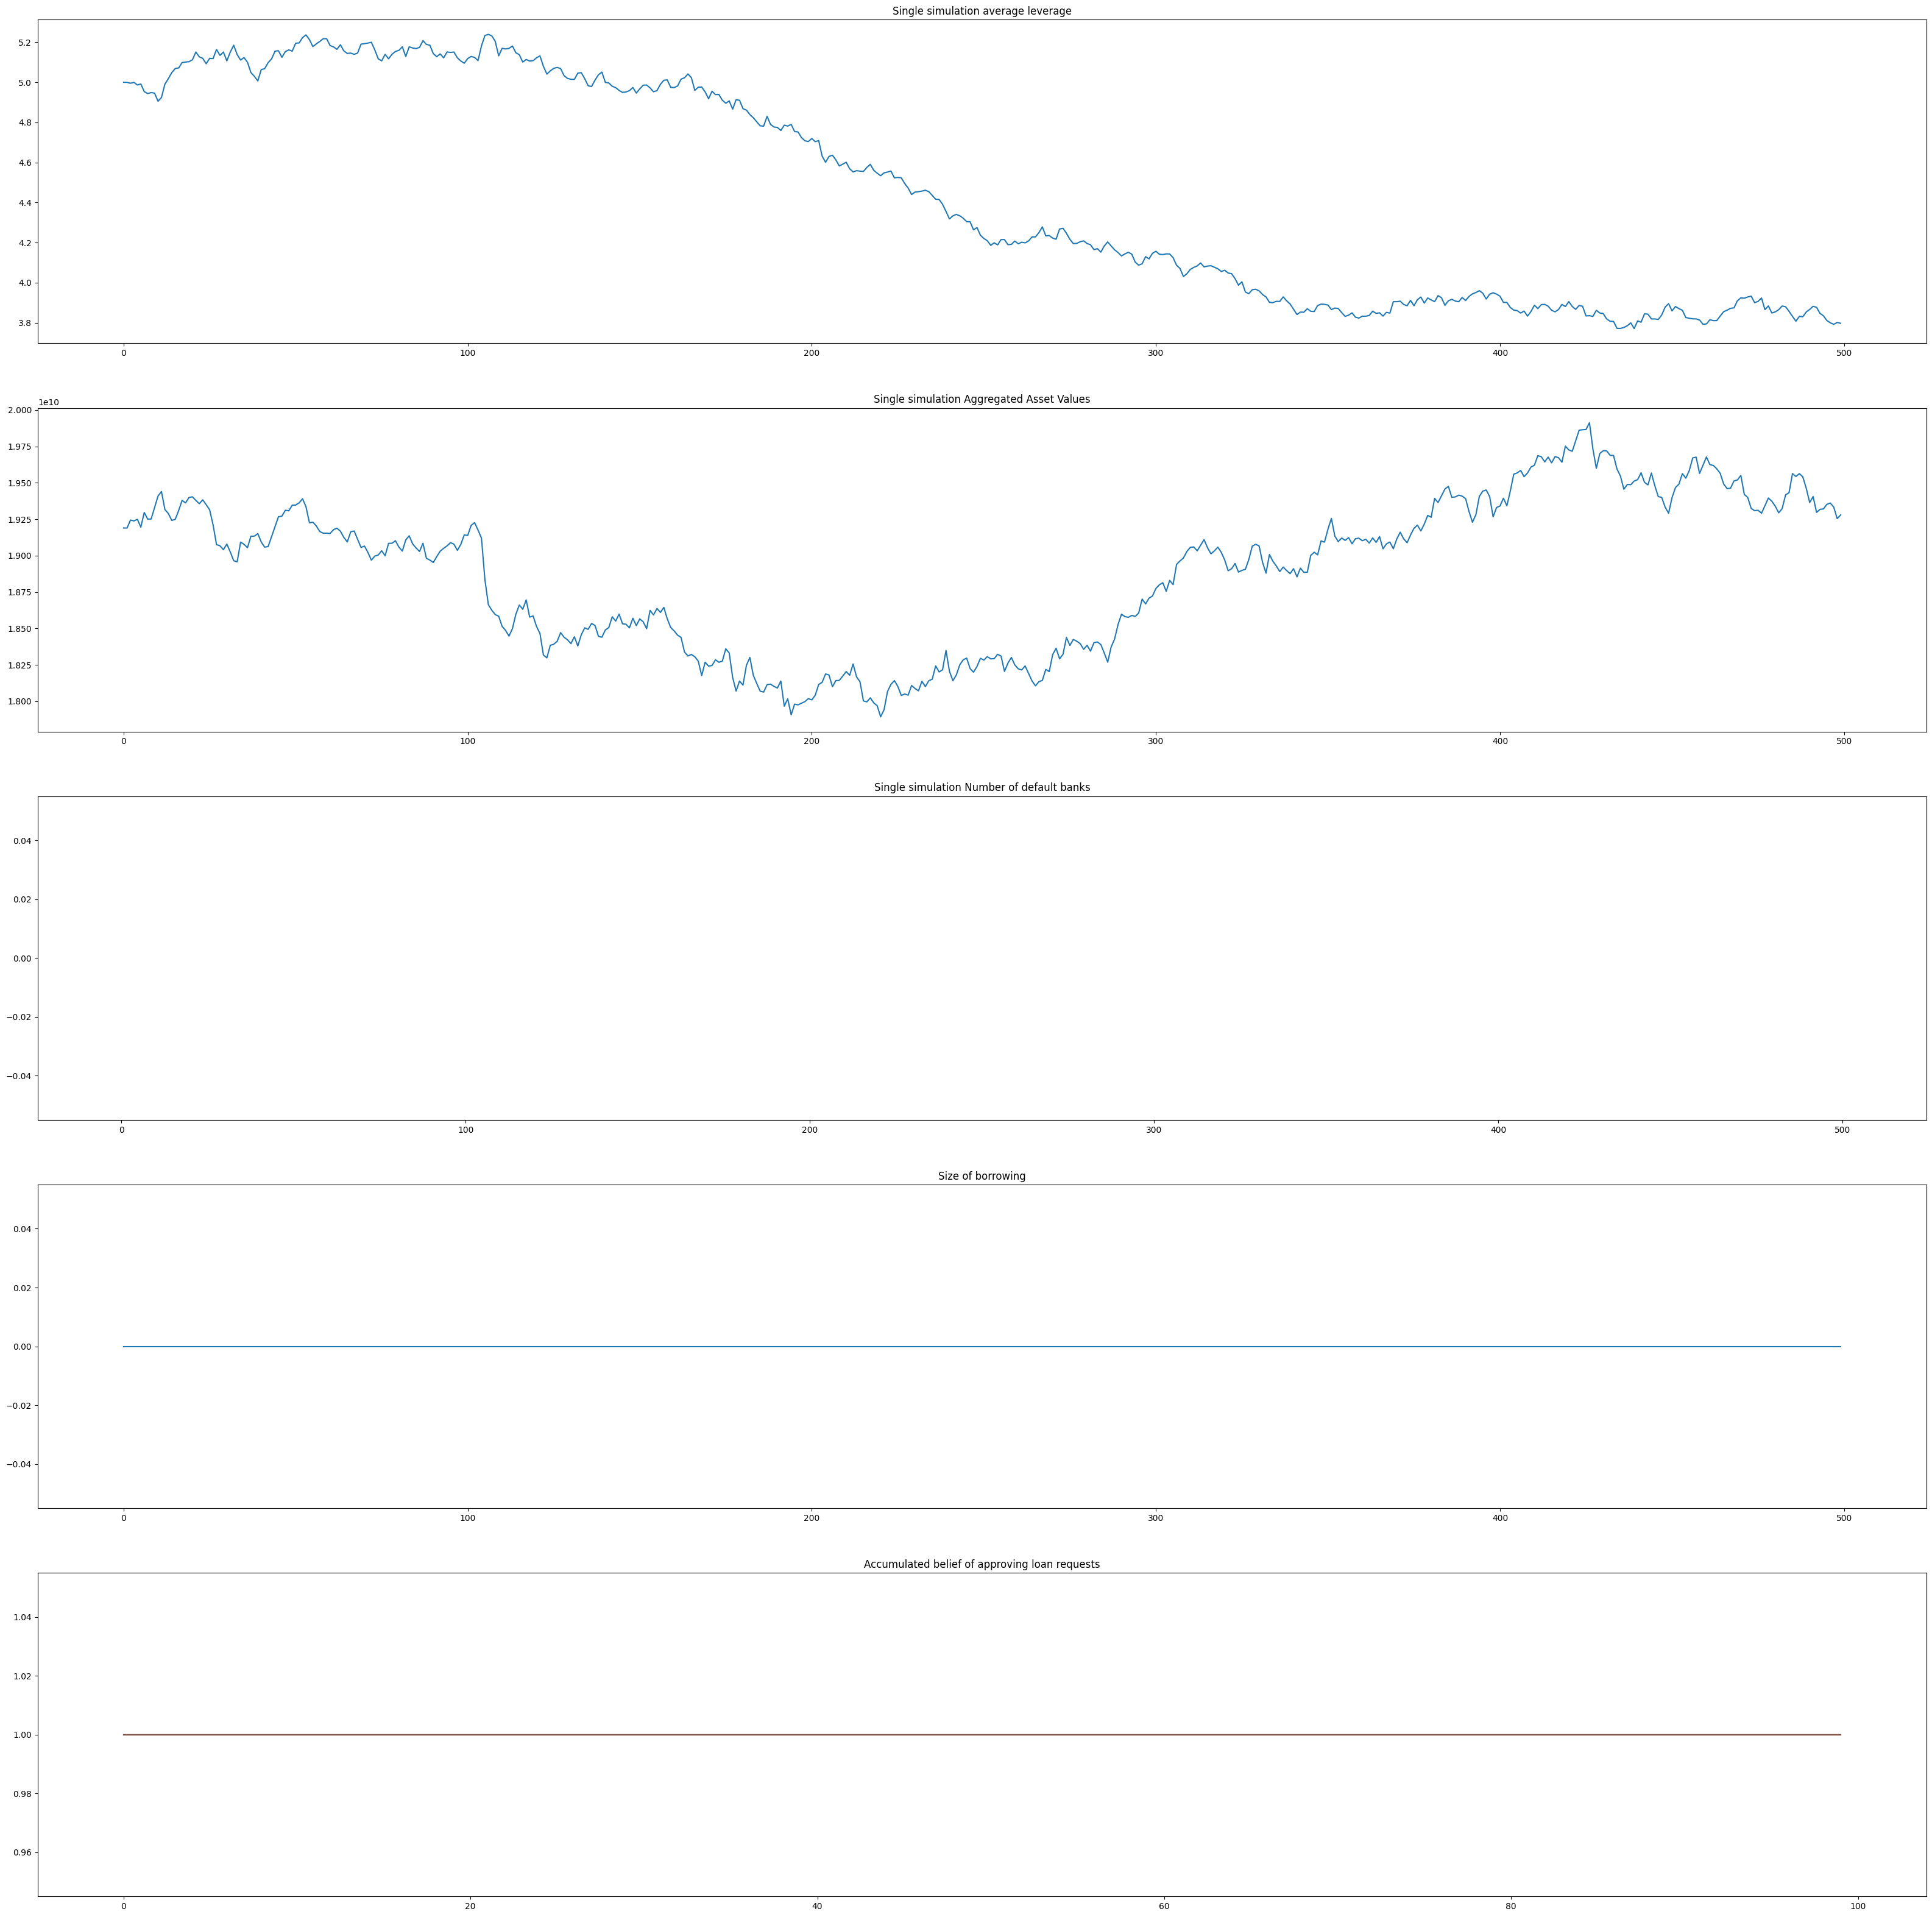

In [11]:
simulationMonitor(agent_data, model_data, simulationSteps)